# Fourier Grid Hamiltonian

### Gabriel A. Amici

Os elementos da matriz que representa o operador hamiltoniano $\hat{H}$ são:

$$ H_{jk} = \dfrac{1}{\Delta x} 
\left \{ 
    \dfrac{1}{Nm} \sum_{\ell = 1}^{n}
    \left (
        \dfrac{2 \pi \ell}{N \Delta x}
    \right )^2

    \cos
    \left [
        \dfrac{2 \pi (j-k)}{N}
    \right ]

    + V(x_j) \delta_{jk}
\right \} $$

In [137]:
import numpy as np
from numba import njit, prange

m = 1
L = 1
ħ = 1

N = 31
n = int((N-1)/2)

x_grid = np.linspace(-0.1, L+0.1, N)

Δx = x_grid[1] - x_grid[0]
Δp = (2*np.pi*ħ)/(N*Δx)

print(Δx)

@njit
def V(x):
    if (x > 0) and (x < L):
        return 0
    else:
        return 1.e15
    
def infinite_well_energies(n):
    return ((np.pi*ħ/L)**2)*(n**2)/(2*m)

def infinite_well_eigenfunctions(n, x):
    if (x > 0) and (x < L):
        return np.sqrt(2/L)*np.sin(n*np.pi*x/L)
    else: 
        return 0



0.04000000000000001


In [138]:
@njit(parallel=True)
def fourier_grid_hamiltonian():
    H = np.empty((N, N))
    
    for j in prange (N):
        for k in prange(N):
            soma = 0
            for ell in prange (1, n):
                soma += (ell*Δp)**2 * np.cos(2*np.pi*ell*(j-k)/(N-1))
            H[j, k] = ((1/((N-1)*m))*soma + V(x_grid[j])*(j==k))

    # Find the eigenvalues and eigenvectors
    eig_energies, eig_states = np.linalg.eig(H)

    # Sort eigenvalues and corresponding eigenvectors
    sort_indexes = np.argsort(eig_energies)
    eig_energies = eig_energies[sort_indexes]
    eig_states = eig_states[:, sort_indexes]/np.sqrt(Δx)

    return eig_energies, eig_states

In [139]:
import matplotlib.pyplot as plt

eig_energies, eig_states = fourier_grid_hamiltonian()

print(eig_energies.real)


[4.26496952e+00 1.74092431e+01 3.81432588e+01 6.96008661e+01
 1.04832726e+02 1.56632611e+02 1.97280242e+02 2.77753624e+02
 2.78434603e+02 3.77192086e+02 4.35054085e+02 5.42109782e+02
 6.26438718e+02 7.49064063e+02 8.52595262e+02 9.92902279e+02
 1.11347650e+03 1.27288603e+03 1.40883887e+03 1.58928048e+03
 1.73826588e+03 1.94338023e+03 2.10037743e+03 2.34020633e+03
 2.49048510e+03 1.00000000e+15 1.00000000e+15 1.00000000e+15
 1.00000000e+15 1.00000000e+15 1.00000000e+15]


In [133]:
print(infinite_well_energies(1))
print(infinite_well_energies(2))
print(infinite_well_energies(3))
print(infinite_well_energies(4))
print(infinite_well_energies(5))


4.934802200544679
19.739208802178716
44.41321980490211
78.95683520871486
123.37005501361698


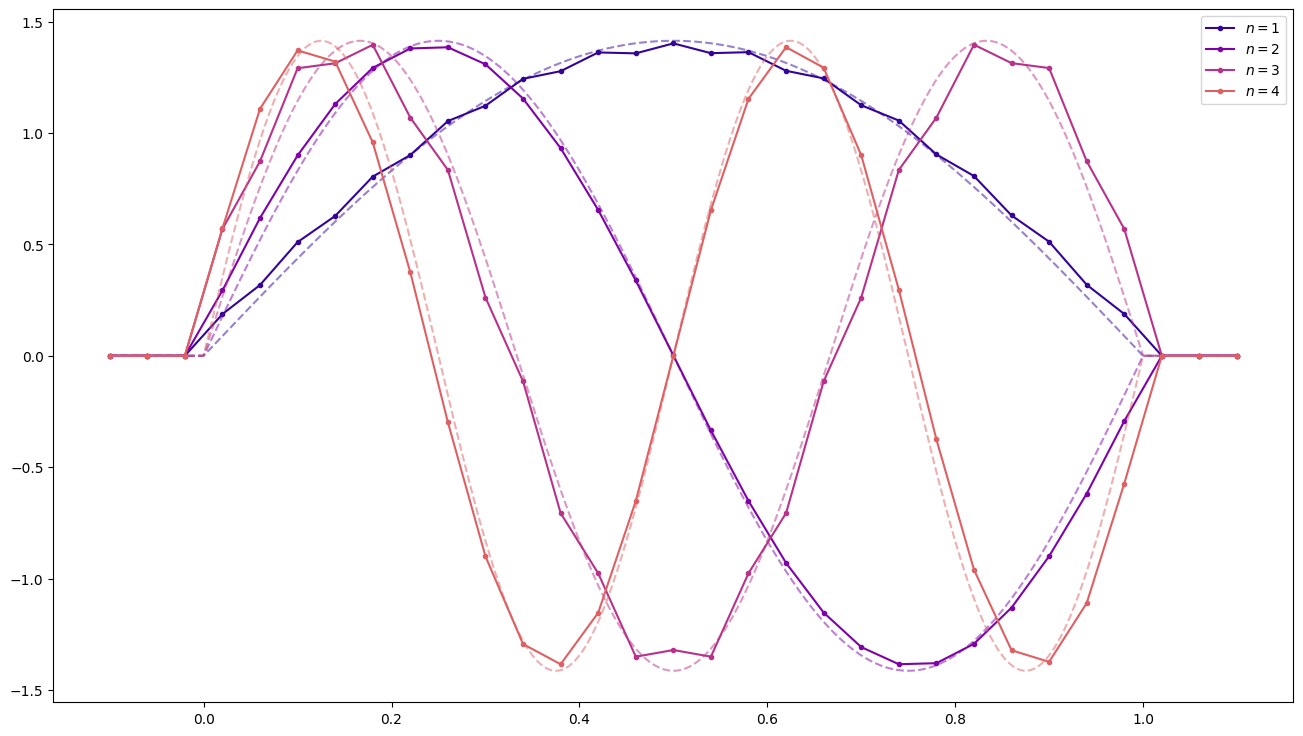

In [148]:
import matplotlib.pyplot as plt
import random

Perc5_DKBLUE_1 = '#340498'
Perc5_PURPLE_2 = '#7e03a7'
Perc5_PINKSH_3 = '#b83289'
Perc5_ROSSEE_4 = '#de6063'
Perc5_ORANGE_5 = '#f8983d'

cols = [Perc5_DKBLUE_1, Perc5_PURPLE_2, Perc5_PINKSH_3, Perc5_ROSSEE_4, Perc5_ORANGE_5]

def normalize_sign(n, phi_fgh):
    i = random.randint(5, len(phi_fgh)-5)
    diff = phi_fgh[i]*infinite_well_eigenfunctions(n, i*Δx)
    if diff < 0:
        return -phi_fgh
    else:
        return phi_fgh

plt.figure(figsize=(16, 9))

x_vals = np.linspace(-0.1, L+0.1, 1000)

for nivel in [1, 2, 3, 4]:
    plt.plot( x_vals, [ infinite_well_eigenfunctions(nivel, x) for x in x_vals ], c=cols[nivel-1], alpha=0.5, ls="dashed")
    plt.plot( x_grid, normalize_sign(nivel, eig_states[:, nivel-1]), marker=".", c=cols[nivel-1], label="$n = {}$".format(nivel) )

plt.legend()